In [2]:
import numpy as np
import pandas as pd

In [4]:
content = pd.read_csv("Data/Content.csv")
reaction = pd.read_csv("Data/Reactions.csv")
reac_type = pd.read_csv("Data/ReactionTypes.csv")

In [3]:
content.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [4]:
reaction.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [5]:
reac_type.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [6]:
reac_type.isnull().sum()

Unnamed: 0    0
Type          0
Sentiment     0
Score         0
dtype: int64

In [7]:
reac_type.nunique()

Unnamed: 0    16
Type          16
Sentiment      3
Score         15
dtype: int64

In [8]:
reaction.isnull().sum()

Unnamed: 0       0
Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64

In [9]:
reaction.shape

(25553, 5)

In [10]:
reac_type.shape

(16, 4)

In [11]:
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Content ID  1000 non-null   object
 2   User ID     1000 non-null   object
 3   Type        1000 non-null   object
 4   Category    1000 non-null   object
 5   URL         801 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [5]:
content = content.drop(columns = {'User ID'})

In [13]:
content.nunique()

Unnamed: 0    1000
Content ID    1000
Type             4
Category        41
URL            801
dtype: int64

In [14]:
list = {'"studying"':'Studying',
        'studying':'Studying',
        'food':'Food',
        '"food"':'Food',
        'technology':'Technology',
        '"technology"':'Technology',
        '"dogs"':"Dogs",
        'dogs':'Dogs',
        "soccer":"Soccer",
        "public speaking":"Public Speaking",
        '"public speaking"':"Public Speaking",
        "science":"Science",
        '"science"':"Science",
        "animals":"Animals",
        '"animals"':"Animals",
        "travel":"Travel",
        '"culture"':"Culture",
        "culture":"Culture",
        "fitness":"Fitness",
        'education':'Education',
        'veganism':'Veganism',
        '"veganism"':'Veganism',
        '"soccer"':'Soccer',
        '"tennis"':'Tennis',
        'tennis':'Tennis',
        'healthy eating':'Healthy eating',
        'Healthy Eating':'Healthy eating',
        'cooking':'Cooking',
        '"cooking"':'Cooking'}
content['Category'] = content['Category'].replace(list)

In [15]:
content['Category'].unique()

array(['Studying', 'Healthy eating', 'Technology', 'Food', 'Cooking',
       'Dogs', 'Soccer', 'Public Speaking', 'Science', 'Tennis', 'Travel',
       'Fitness', 'Education', 'Veganism', 'Animals', 'Culture'],
      dtype=object)

In [16]:
content.nunique()

Unnamed: 0    1000
Content ID    1000
Type             4
Category        16
URL            801
dtype: int64

In [17]:
content = content.rename(columns = {'Type':'Content_type'})

In [22]:
# deleting unwanted columns

content = content.drop(columns = 'URL')
content = content.drop(columns = 'Unnamed: 0')

In [23]:
content.head()

,Content ID,Content_type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,Healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,Healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,Technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,Food


In [24]:
reac_type['Type'].unique()

array(['heart', 'want', 'disgust', 'hate', 'interested', 'indifferent',
       'love', 'super love', 'cherish', 'adore', 'like', 'dislike',
       'intrigued', 'peeking', 'scared', 'worried'], dtype=object)

In [25]:
reaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25553 non-null  int64 
 1   Content ID  25553 non-null  object
 2   User ID     22534 non-null  object
 3   Type        24573 non-null  object
 4   Datetime    25553 non-null  object
dtypes: int64(1), object(4)
memory usage: 998.3+ KB


In [26]:
# removing entire rows that has NA values in 'Type' column

reaction = reaction.dropna(subset= 'Type')

In [27]:
reaction.count()

Unnamed: 0    24573
Content ID    24573
User ID       22534
Type          24573
Datetime      24573
dtype: int64

In [28]:
reaction = reaction.drop(columns = 'User ID')

In [31]:
reaction = reaction.drop(columns = 'Unnamed: 0')

In [29]:
reaction = reaction.rename(columns = {'Type' : 'Reaction_type'})

In [32]:
reaction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24573 entries, 1 to 25552
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Content ID     24573 non-null  object
 1   Reaction_type  24573 non-null  object
 2   Datetime       24573 non-null  object
dtypes: object(3)
memory usage: 767.9+ KB


In [33]:
reac_type = reac_type.rename(columns = {'Type' : 'Reaction_type'})

In [34]:
reac_type['Sentiment'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [35]:
content.head()

,Content ID,Content_type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,Healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,Healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,Technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,Food


In [37]:
reaction.head()

,Content ID,Reaction_type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58


In [39]:
reac_type = reac_type.drop(columns = 'Unnamed: 0')

In [40]:
reac_type.head()

,Reaction_type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


In [41]:
new_table = pd.merge(reaction,content,on = 'Content ID', how= 'left')
new_table

,Content ID,Reaction_type,Datetime,Content_type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,Studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,Studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,Studying
...,...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,audio,Technology
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,audio,Technology
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58,audio,Technology
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,audio,Technology


In [42]:
new_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Content ID     24573 non-null  object
 1   Reaction_type  24573 non-null  object
 2   Datetime       24573 non-null  object
 3   Content_type   24573 non-null  object
 4   Category       24573 non-null  object
dtypes: object(5)
memory usage: 960.0+ KB


In [43]:
new_table.head()

,Content ID,Reaction_type,Datetime,Content_type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,Studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,Studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,Studying


In [44]:
new_table['Category'].unique()

array(['Studying', 'Healthy eating', 'Technology', 'Food', 'Cooking',
       'Dogs', 'Soccer', 'Public Speaking', 'Science', 'Tennis', 'Travel',
       'Fitness', 'Education', 'Veganism', 'Animals', 'Culture'],
      dtype=object)

In [45]:
table = pd.merge(new_table,reac_type,on = 'Reaction_type', how= 'left')
table

,Content ID,Reaction_type,Datetime,Content_type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,Studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,Studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,Studying,positive,30
...,...,...,...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,audio,Technology,negative,10
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,audio,Technology,positive,45
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58,audio,Technology,positive,30
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,audio,Technology,negative,12


In [46]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Content ID     24573 non-null  object
 1   Reaction_type  24573 non-null  object
 2   Datetime       24573 non-null  object
 3   Content_type   24573 non-null  object
 4   Category       24573 non-null  object
 5   Sentiment      24573 non-null  object
 6   Score          24573 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


In [52]:
Categories = table.groupby('Category').sum('Score')
Categories = Categories.sort_values(by = 'Score',ascending = False)

In [48]:
top_5 = Categories.sort_values(by = 'Score',ascending = False).head(5)
top_5

,Score
Category,
Animals,74965
Science,71168
Healthy eating,69339
Technology,68738
Food,66676


In [31]:
import matplotlib.pyplot as plt

In [32]:
import seaborn as sns

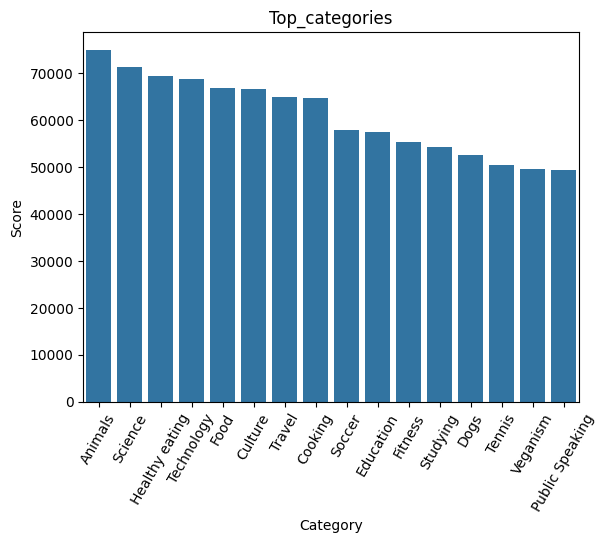

In [66]:
sns.barplot(data = Categories, x = 'Category', y = 'Score')
plt.xticks(rotation= 60)
plt.title('Top_categories')
plt.savefig('Top_categories.png')
plt.show()

From the above barchart, we can see the top and bottom 5 categories that the users most used.

Then we can move to the second question that how many reactions are there to the most popular category. Here 'Animals' is the most popular category and find out the reactions that used.

In [67]:
table['Reaction_type'].unique()

array(['disgust', 'dislike', 'scared', 'interested', 'peeking', 'cherish',
       'hate', 'love', 'indifferent', 'super love', 'intrigued',
       'worried', 'like', 'heart', 'want', 'adore'], dtype=object)

In [73]:
animal_tab = table.query('Category == "Animals"')

16

In [82]:
animal_tab = animal_tab[['Category','Reaction_type']]

In [83]:
animal_tab.head()

,Category,Reaction_type
910,Animals,cherish
911,Animals,intrigued
912,Animals,like
913,Animals,love
914,Animals,hate


In [85]:
animal_reaction = animal_tab.groupby('Reaction_type')
animal_reaction =animal_reaction.count()

In [86]:
animal_reaction

,Category
Reaction_type,
adore,114
cherish,125
disgust,122
dislike,115
hate,128
heart,120
indifferent,100
interested,110
intrigued,116


In [87]:
animal_reaction.sort_values(by = 'Category',ascending = False)

,Category
Reaction_type,
scared,132
peeking,129
hate,128
cherish,125
super love,123
disgust,122
want,122
worried,121
heart,120


I found that 'scared' is the mostly used reaction in the animal category. Then followed by peeking, hate, cherish and super love.

Third question to answer next is, in which month the most posts posted?

In [124]:
table['Datetime'] = pd.to_datetime(table['Datetime'])
table['Year_Month'] = table['Datetime'].dt.year.astype(str)+"_"+table['Datetime'].dt.month.map("{:02}".format).astype(str)
table.head()

,Content ID,Reaction_type,Datetime,Content_type,Category,Sentiment,Score,Month,Year,Year_Month
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying,negative,0,11,2020,2020_11
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,Studying,negative,10,6,2021,2021_06
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,Studying,negative,15,4,2021,2021_04
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying,negative,0,1,2021,2021_01
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,Studying,positive,30,8,2020,2020_08


In [134]:
most_post = table.groupby('Year_Month')
m_post = most_post['Content ID'].count()
m_post

Year_Month
2020_06     892
2020_07    2070
2020_08    2114
2020_09    2022
2020_10    2056
2020_11    2034
2020_12    2092
2021_01    2126
2021_02    1914
2021_03    2012
2021_04    1974
2021_05    2138
2021_06    1129
Name: Content ID, dtype: int64

In [139]:
m_post.info()

<class 'pandas.core.series.Series'>
Index: 13 entries, 2020_06 to 2021_06
Series name: Content ID
Non-Null Count  Dtype
--------------  -----
13 non-null     int64
dtypes: int64(1)
memory usage: 764.0+ bytes


In [140]:
m_post = pd.DataFrame(m_post)

In [141]:
m_post.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 2020_06 to 2021_06
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Content ID  13 non-null     int64
dtypes: int64(1)
memory usage: 764.0+ bytes


In [142]:
m_post

,Content ID
Year_Month,
2020_06,892
2020_07,2070
2020_08,2114
2020_09,2022
2020_10,2056
2020_11,2034
2020_12,2092
2021_01,2126
2021_02,1914


In [143]:
post = m_post.sort_values(by = 'Content ID', ascending = False)
post

,Content ID
Year_Month,
2021_05,2138
2021_01,2126
2020_08,2114
2020_12,2092
2020_07,2070
2020_10,2056
2020_11,2034
2020_09,2022
2021_03,2012


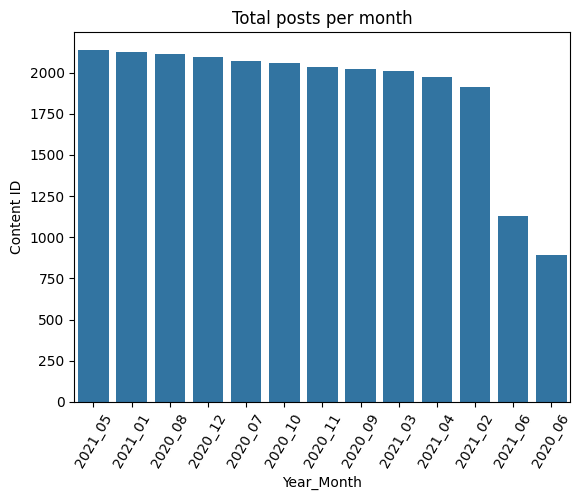

In [144]:
sns.barplot(data = post, x = 'Year_Month', y = 'Content ID')
plt.xticks(rotation= 60)
plt.title('Total posts per month')
plt.savefig('Total_post.png')
plt.show()

As we can see, the may month of 2021 remains top and the june month of both 2020 and 2021 remains the bottom position. So,it is necessary to take more care in this month and to find reason for this happening.

Here I am going to perform a trend analysis by answer the following question. Determine the monthly trend of sentiment scores for the "Animals" category over the past year. Visualize the trend using appropriate charts.

This is the second part of the project. Already I  had saved the 'table' object name which we used before as a .csv file. So, I'm going to use it directly not going to perform any data cleaning actions here.

In [8]:
table = pd.read_csv("final_data.csv")
table.head()

,Content ID,Reaction_type,Datetime,Content_type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,Studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,Studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,Studying,positive,30


In [9]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Content ID     24573 non-null  object
 1   Reaction_type  24573 non-null  object
 2   Datetime       24573 non-null  object
 3   Content_type   24573 non-null  object
 4   Category       24573 non-null  object
 5   Sentiment      24573 non-null  object
 6   Score          24573 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


As it's necessary to convert the 'Datetime' column to datetime datatype, going to perform it first and then to separate the month and year from that column is required.

In [19]:
table['Datetime'] = pd.to_datetime(table['Datetime'])
table['Year_Month'] = table['Datetime'].dt.year.astype(str)+"_"+table['Datetime'].dt.month.map("{:02}".format).astype(str)
table.head()

,Content ID,Reaction_type,Datetime,Content_type,Category,Sentiment,Score,Year_Month
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying,negative,0,2020_11
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,Studying,negative,10,2021_06
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,Studying,negative,15,2021_04
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying,negative,0,2021_01
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,Studying,positive,30,2020_08


In [41]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Content ID     24573 non-null  object        
 1   Reaction_type  24573 non-null  object        
 2   Datetime       24573 non-null  datetime64[ns]
 3   Content_type   24573 non-null  object        
 4   Category       24573 non-null  object        
 5   Sentiment      24573 non-null  object        
 6   Score          24573 non-null  int64         
 7   Year_Month     24573 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 1.5+ MB


In [46]:
a = table.query('Year_Month == "2020_06"')

In [48]:
a = a.sort_values(by = 'Datetime',ascending  = True)
a

,Content ID,Reaction_type,Datetime,Content_type,Category,Sentiment,Score,Year_Month
14550,a727ed7f-5684-4536-b543-8e8fc93f40b1,hate,2020-06-18 08:07:22,video,Cooking,negative,5,2020_06
6635,70b0202f-cd58-42fe-acd9-7b2f8cf9e7c6,scared,2020-06-18 08:22:47,video,Cooking,negative,15,2020_06
22969,edea43f3-1541-4e42-8419-d1cdf749025c,intrigued,2020-06-18 08:51:33,photo,Cooking,positive,45,2020_06
22661,a8160135-2d55-4240-8f28-fbee5ec84801,scared,2020-06-18 09:13:59,video,Studying,negative,15,2020_06
4066,6e418568-a2b9-4d08-b241-06362c96a7f1,adore,2020-06-18 10:37:41,video,Food,positive,72,2020_06
...,...,...,...,...,...,...,...,...
8305,2d10f5b0-c590-429f-8b68-52c239617d26,peeking,2020-06-30 21:53:23,GIF,Technology,neutral,35,2020_06
21861,c892a472-bf81-4946-83c0-d3697ba65b95,peeking,2020-06-30 21:58:25,photo,Soccer,neutral,35,2020_06
815,74718bbf-e5a3-442f-8ca2-4a3428757fc1,indifferent,2020-06-30 22:30:50,video,Dogs,neutral,20,2020_06
941,457301ee-3e87-40d8-8b82-ea4e1fa90e39,disgust,2020-06-30 23:11:07,GIF,Healthy eating,negative,0,2020_06


In [20]:
table.shape

(24573, 8)

In [22]:
animal = table.query('Category == "Animals"')
animal.shape

(1897, 8)

In [29]:
animal_sentiment = animal.groupby(['Year_Month','Sentiment'])
animal_s = animal_sentiment['Score'].sum().reset_index(name  = "Total_score")
animal_s.head()

,Year_Month,Sentiment,Total_score
0,2020_06,negative,199
1,2020_06,neutral,380
2,2020_06,positive,2873
3,2020_07,negative,330
4,2020_07,neutral,410


In [30]:
animal_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year_Month   39 non-null     object
 1   Sentiment    39 non-null     object
 2   Total_score  39 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ KB


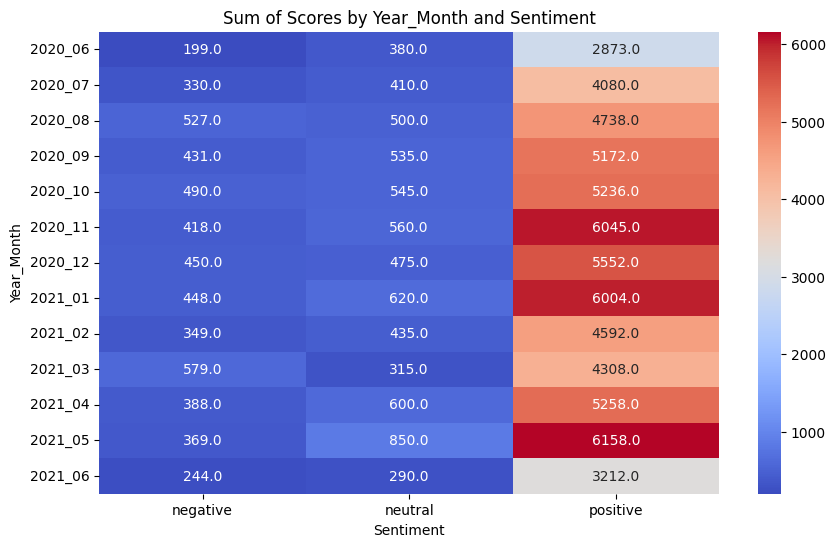

In [40]:
# Pivot the DataFrame to have Sentiment as columns and Year_Month as index
heatmap_data = animal_s.pivot(index='Year_Month', columns='Sentiment', values='Total_score')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Sum of Scores by Year_Month and Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Year_Month')
plt.savefig("month over sentiment_score")
plt.show()

We can clearly see that the 'positive' sentiment is huge(few thousands) whereas the 'neutral' and 'negative' sentiments is very minimal.

Recently found that the month of june in both the years 2020 and 2021 were missing some data. That's the reason why we get less values in the graph.

Let me jump to the next question.  Calculate the average sentiment score for each reaction type across all categories. Identify which reaction type has the highest average sentiment score and which has the lowest.

In [50]:
five = table.groupby(['Category','Reaction_type'])
five_s = five['Score'].mean().reset_index(name = "Average_score")
five_s.head()

,Category,Reaction_type,Average_score
0,Animals,adore,72.0
1,Animals,cherish,70.0
2,Animals,disgust,0.0
3,Animals,dislike,10.0
4,Animals,hate,5.0


In [56]:
adore = table.query('Category == "Animals" & Reaction_type == "adore"')
print(adore)

                                 Content ID Reaction_type            Datetime  \
918    07f88a73-aef2-45fd-8b5d-418e448b853d         adore 2021-02-12 16:37:09   
993    4fa14453-7b29-4302-b51f-9aa23b472c1b         adore 2020-09-06 09:22:49   
3149   f01ec49c-3179-43bb-b127-2b1a73f34b06         adore 2021-02-11 19:20:24   
3509   2cbbdbf6-b34e-4fbb-bdc6-904e61f91ce7         adore 2020-10-12 14:17:09   
3521   2cbbdbf6-b34e-4fbb-bdc6-904e61f91ce7         adore 2021-03-17 07:37:15   
...                                     ...           ...                 ...   
24219  cab37e79-0e76-4bd2-b6bd-2fc8bf66ca99         adore 2020-11-26 06:17:45   
24231  cab37e79-0e76-4bd2-b6bd-2fc8bf66ca99         adore 2020-10-16 06:13:12   
24339  89cb4504-fccd-40f4-945e-410f74ee4735         adore 2020-11-18 17:02:24   
24341  89cb4504-fccd-40f4-945e-410f74ee4735         adore 2020-10-03 18:30:41   
24352  89cb4504-fccd-40f4-945e-410f74ee4735         adore 2021-05-08 17:29:47   

      Content_type Category

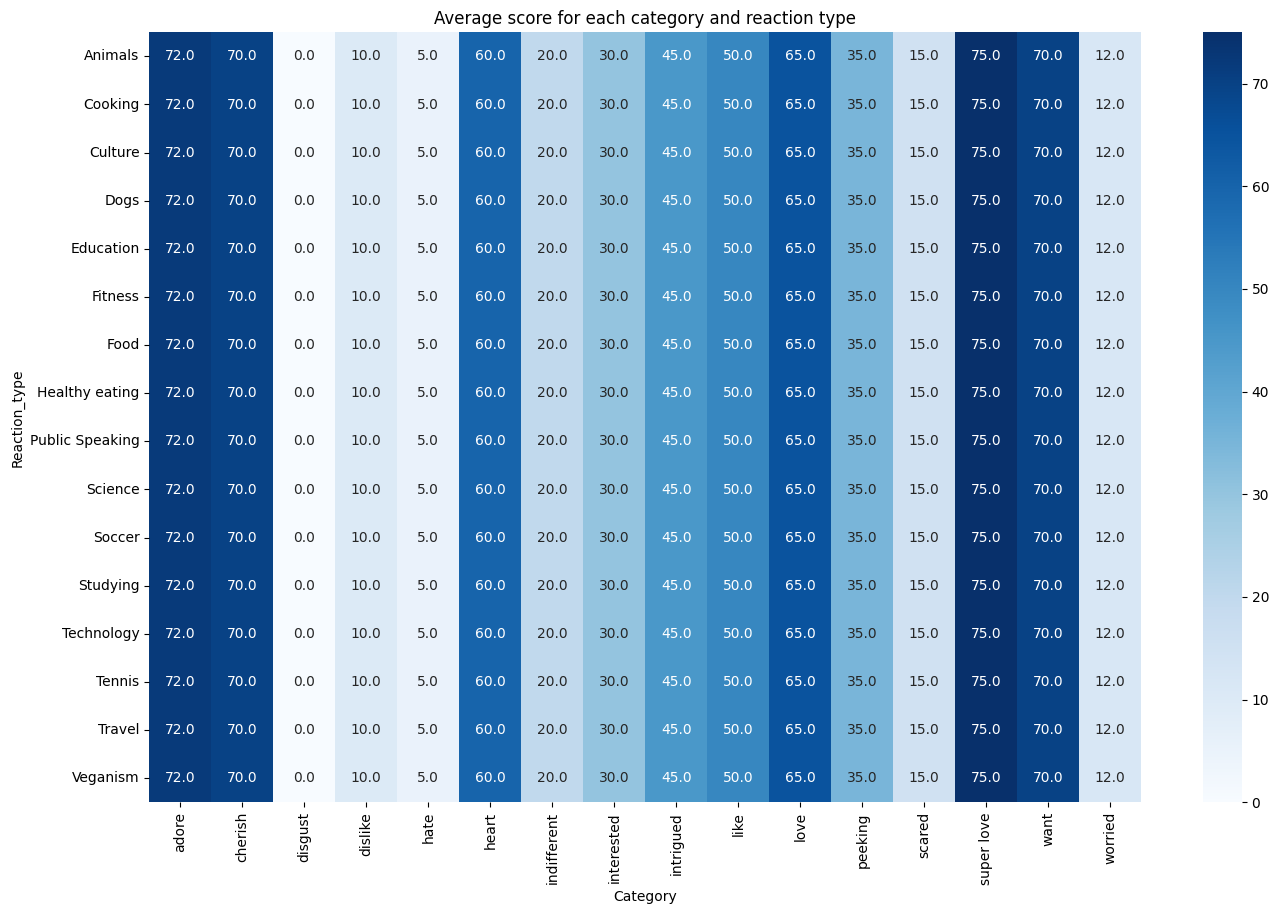

In [52]:
data = five_s.pivot(index = 'Category', columns = 'Reaction_type', values = 'Average_score')
plt.figure(figsize=(16,10))
sns.heatmap(data, annot = True, cmap = 'Blues',fmt = '.1f')
plt.title("Average score for each category and reaction type")
plt.xlabel("Category")
plt.ylabel("Reaction_type")
plt.savefig("Average_score_5")
plt.show()

'Super love' is the reaction that is widely used by the users. These values are the scores of each reactions.So the values in the heatmap remains the same in each reaction columns.

Let me perform some high level analysis by answering the following question.

Temporal Sentiment Analysis: Conduct a time-series analysis to identify any significant changes in sentiment scores over time for each category.
Use advanced statistical methods (e.g., ARIMA, Prophet) to forecast future sentiment trends for the top three categories.

In [80]:
data = table[['Datetime','Category','Year_Month','Score']]
data.head()

,Datetime,Category,Year_Month,Score
0,2020-11-07 09:43:50,Studying,2020_11,0
1,2021-06-17 12:22:51,Studying,2021_06,10
2,2021-04-18 05:13:58,Studying,2021_04,15
3,2021-01-06 19:13:01,Studying,2021_01,0
4,2020-08-23 12:25:58,Studying,2020_08,30


In [82]:
data['Date'] = data['Datetime'].dt.year.astype(str) +"-"+ data['Datetime'].dt.month.map("{:02}".format).astype(str) +"-"+ data['Datetime'].dt.day.map("{:02}".format).astype(str)
data.head()

C:\Users\sys1\AppData\Local\Temp\ipykernel_10244\3164863669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = data['Datetime'].dt.year.astype(str) +"-"+ data['Datetime'].dt.month.map("{:02}".format).astype(str) +"-"+ data['Datetime'].dt.day.map("{:02}".format).astype(str)


,Datetime,Category,Year_Month,Score,Date
0,2020-11-07 09:43:50,Studying,2020_11,0,2020-11-07
1,2021-06-17 12:22:51,Studying,2021_06,10,2021-06-17
2,2021-04-18 05:13:58,Studying,2021_04,15,2021-04-18
3,2021-01-06 19:13:01,Studying,2021_01,0,2021-01-06
4,2020-08-23 12:25:58,Studying,2020_08,30,2020-08-23


In [84]:
data['Date'] = pd.to_datetime(data['Date'])

C:\Users\sys1\AppData\Local\Temp\ipykernel_10244\1453708669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Datetime    24573 non-null  datetime64[ns]
 1   Category    24573 non-null  object        
 2   Year_Month  24573 non-null  object        
 3   Score       24573 non-null  int64         
 4   Date        24573 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 960.0+ KB


In [101]:
d['date'] = table['Datetime'].dt.date

In [102]:
d.head()

,Datetime,date
0,2020-11-07 09:43:50,2020-11-07
1,2021-06-17 12:22:51,2021-06-17
2,2021-04-18 05:13:58,2021-04-18
3,2021-01-06 19:13:01,2021-01-06
4,2020-08-23 12:25:58,2020-08-23


I got the score for each category over the year_month column. But I need to get the top 3 category which i need for forecasting.

In [65]:
data1 = data.groupby('Category')
data1 = data1['Score'].sum().reset_index(name = "score")
data1 = data1.sort_values(by = "score", ascending = False)
data1.head(3)

,Category,score
0,Animals,74965
9,Science,71168
7,Healthy eating,69339


In [107]:
animals_data = data.query('Category == "Animals"')
animals_data

,Datetime,Category,Year_Month,Score,Date
910,2021-03-12 16:22:28,Animals,2021_03,70,2021-03-12
911,2020-10-17 10:20:24,Animals,2020_10,45,2020-10-17
912,2020-12-19 16:42:35,Animals,2020_12,50,2020-12-19
913,2021-05-31 05:46:59,Animals,2021_05,65,2021-05-31
914,2020-12-27 03:37:01,Animals,2020_12,5,2020-12-27
...,...,...,...,...,...
24369,2021-04-05 00:52:42,Animals,2021_04,15,2021-04-05
24370,2020-10-30 16:30:15,Animals,2020_10,75,2020-10-30
24371,2021-04-01 18:09:07,Animals,2021_04,5,2021-04-01
24372,2020-08-16 03:02:19,Animals,2020_08,65,2020-08-16


In [110]:
animals_dat = animals_data.groupby('Date')
animal_dat = animals_dat['Score'].sum().reset_index(name = "Animal_score")
animal_dat

,Date,Animal_score
0,2020-06-18,175
1,2020-06-19,310
2,2020-06-20,35
3,2020-06-21,212
4,2020-06-22,242
...,...,...
358,2021-06-14,335
359,2021-06-15,352
360,2021-06-16,100
361,2021-06-17,120


In [111]:
animal_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          363 non-null    datetime64[ns]
 1   Animal_score  363 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


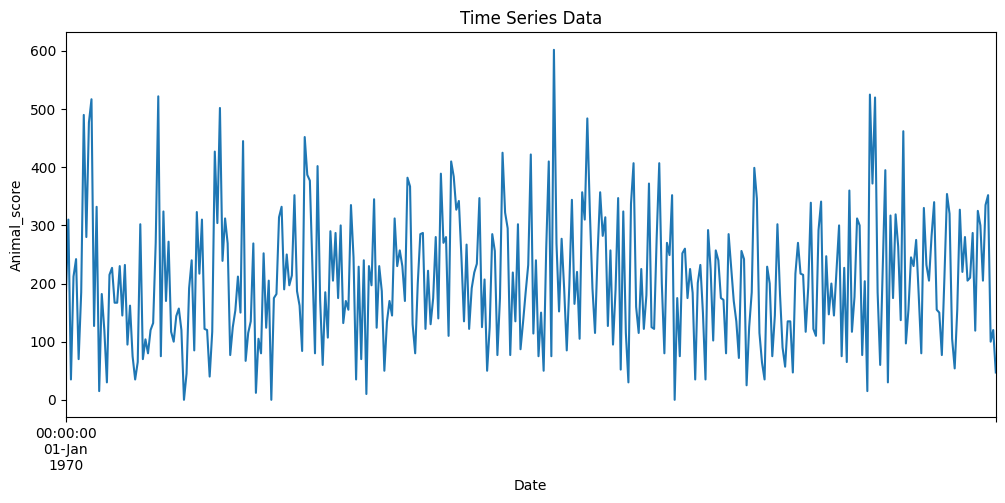

In [127]:
from statsmodels.tsa.arima.model import ARIMA

# time series data stored in a DataFrame named 'animal_dat'
# Make sure the index of the DataFrame is datetime.

# Visualize the time series data
animal_dat['Animal_score'].plot(figsize=(12,5))
plt.xlabel('Date')
plt.ylabel('Animal_score')
plt.title('Time Series Data')
plt.show()

As we can clearly see that the data(animal_dat) is stationary. It's not showing any trend(up/down), remains neutral throughout the graph. No need to take Logarithm or differencing to the data.

In [115]:
 data_diff = animal_dat.diff().dropna()

In [120]:
animal_dat.index = pd.to_datetime(animal_dat.index)

In [146]:
animal_dat.set_index('Date', inplace=True)

In [147]:
animal_dat.dtypes

Animal_score    int64
dtype: object

In [148]:
animal_dat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 363 entries, 2020-06-18 to 2021-06-18
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Animal_score  363 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


I'm going to find the values of (p,q,d) using the 'auto_arima' method.

In [135]:
import pmdarima as pm
a = animal_dat['Animal_score'] 
auto_arima = pm.auto_arima(a, stepwise = False, seasonal = False)
auto_arima

ARIMA(order=(5, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [136]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(a, order= (5,0,0))
model_fit= model.fit()
print(model_fit.summary())

C:\Users\sys1\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
C:\Users\sys1\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
C:\Users\sys1\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Animal_score   No. Observations:                  363
Model:                 ARIMA(5, 0, 0)   Log Likelihood               -2228.012
Date:                Wed, 15 May 2024   AIC                           4470.024
Time:                        09:48:01   BIC                           4497.285
Sample:                    01-01-1970   HQIC                          4480.860
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        206.5152      6.753     30.581      0.000     193.279     219.751
ar.L1          0.0439      0.051      0.862      0.388      -0.056       0.144
ar.L2          0.0381      0.049      0.776      0.4

P-value is important to look into. Because it is necessary to check whether the data is stationarity or unstationarity.

In [139]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(animal_dat['Animal_score'])
print(f'p-value: {adf_test[1]}')

p-value: 2.5249199577219837e-30


In summary, a p-value of 2.5249199577219837e-30 is very low, indicating that your data is likely stationary, which is generally good for modeling with methods like ARIMA.

In [159]:
animal_dat.index = range(1,364)

In [160]:
animal_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 1 to 363
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Animal_score  363 non-null    int64
dtypes: int64(1)
memory usage: 3.0 KB


In [161]:
msk = (animal_dat.index < len(animal_dat)-30)
a_train = animal_dat[msk].copy()
a_test = animal_dat[~msk].copy()

<Axes: title={'center': 'Forecast_manual'}>

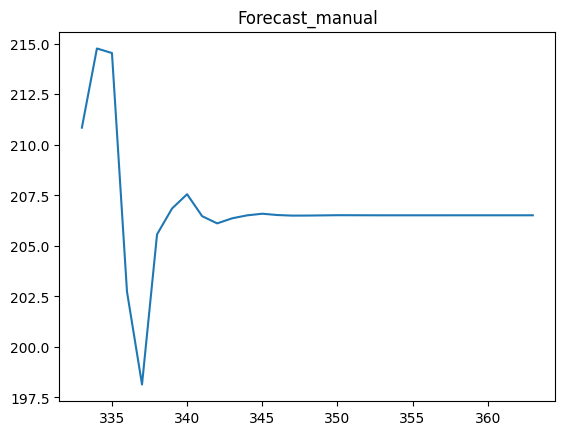

In [168]:
forecast_test = model_fit.forecast(len(a_test))

animal_dat['forecast_manual'] = [None]*len(a_train) + list(forecast_test)
plt.title("Forecast_manual")
plt.savefig("Forecast_manual")
animal_dat['forecast_manual'].plot()

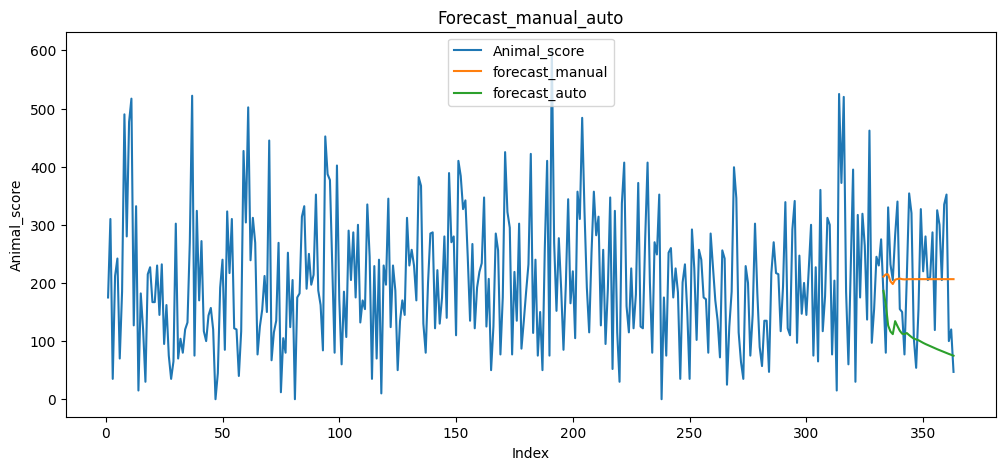

In [193]:
forecast_test_auto = auto_arima.predict(n_periods=len(a_test))
animal_dat['forecast_auto'] = [None]*len(a_train) + list(forecast_test_auto)
animal_dat.plot(figsize=(12,5))
plt.title("Forecast_manual_auto")
plt.xlabel("Index")
plt.ylabel("Animal_score")
plt.savefig("forecast_manual_auto")

In [197]:
animal_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 1 to 363
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Animal_score     363 non-null    int64  
 1   forecast_manual  31 non-null     float64
 2   forecast_auto    31 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 8.6 KB


In [205]:

new_index = range(1, 394)
animal_da = animal_dat.reindex(new_index)

# Fill NaN values in the new index positions
animal_da.fillna(value=np.nan, inplace=True)  # Assuming 'pd' is the pandas alias

# Optional: If you want to verify that the index range has been extended and NaN values have been filled
print(animal_da.head())


   Animal_score  forecast_manual  forecast_auto
1         175.0              NaN            NaN
2         310.0              NaN            NaN
3          35.0              NaN            NaN
4         212.0              NaN            NaN
5         242.0              NaN            NaN


<Axes: >

<Figure size 640x480 with 0 Axes>

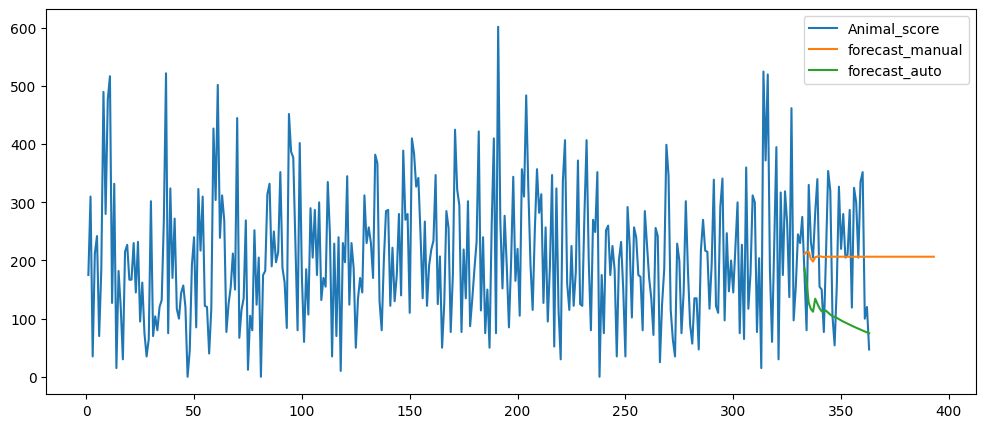

In [208]:
forecast_test = model_fit.forecast(len(a_test)+30)

animal_da['forecast_manual'] = [None]*len(a_train) + list(forecast_test)
plt.savefig("forecast")
animal_da.plot(figsize=(12,5))

Finally, I forecasted the reaction score of animals category for the next 30 days. The orange color line depicts the forecast of the animals' reaction score which stands at 206. This is done using the ARIMA model. The green line of forecast_auto is just a try, how the auto_arima works. It shows us the downtrend and also the (p,q,d) value as (5,0,0).